In [ ]:
import os
from importlib import reload

import matplotlib.pyplot as plt

from src import plots, tools

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

In [ ]:
reload(tools)
X, y, meta = tools.load_data("data/raw/ASCAD.h5", "Profiling")

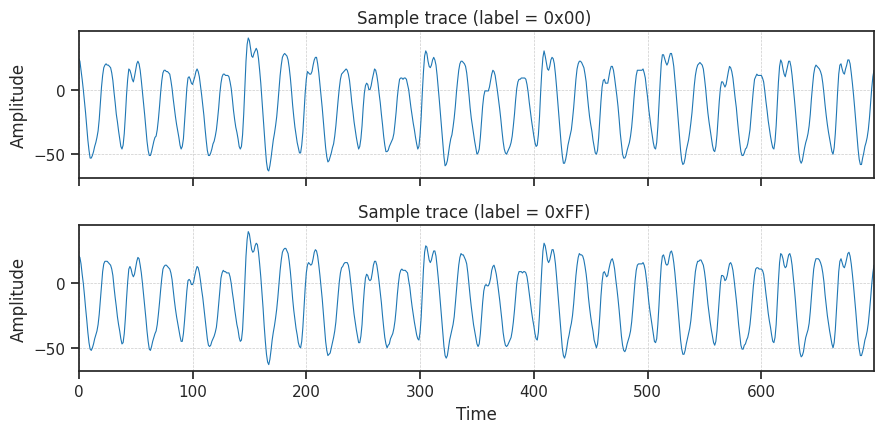

In [ ]:
reload(plots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 5), sharex=True)

plots.show_sample_trace(X, y, byte_value=0x00, ax=ax1, seed=SEED)
plots.show_sample_trace(X, y, byte_value=0xFF, ax=ax2, seed=SEED)

fig.tight_layout(h_pad=1)
fig.savefig("figures/sample_traces.png", dpi=300)

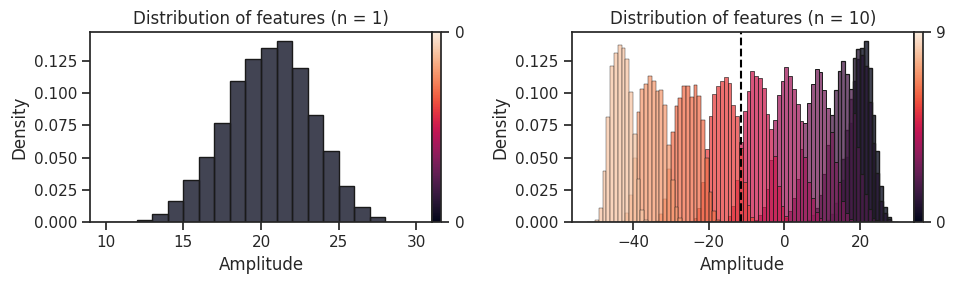

In [5]:
reload(plots)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

plots.feature_histogram(X, idx=[0], ax=ax[0])
plots.feature_histogram(X, idx=range(10), ax=ax[1], mean=True)

fig.tight_layout()
fig.savefig("figures/feature_histograms.png", dpi=300)

Cechy podlegają rozkładowi normalnemu

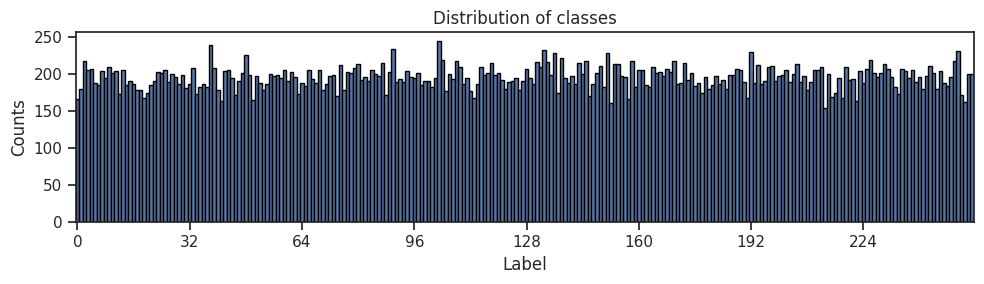

In [10]:
reload(plots)

fig = plt.figure(figsize=(10, 3))

plots.class_distribution(y, ax=fig.add_subplot(111))

fig.tight_layout()
fig.savefig("figures/label_distribution.png", dpi=300)

Klasy są zbalansowane

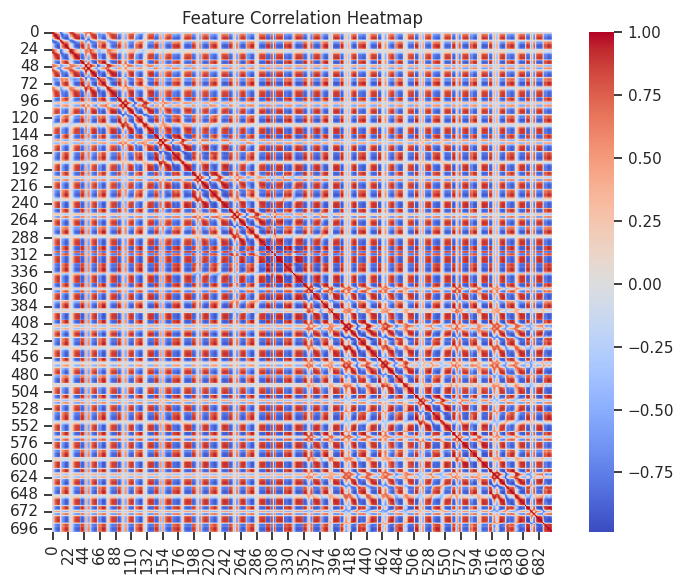

In [ ]:
reload(plots)

fig = plt.figure(figsize=(8, 6))
plots.feature_correlation(X, ax=fig.add_subplot(111))
fig.tight_layout()
fig.savefig("figures/feature_correlation.png", dpi=300)

Cechy znajdujące się w podobnym momencie cyklu są ze sobą silnie skorelowane liniowo